<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/Generate_groupwise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating random numbers from a uniform distribution
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787125698/12/ch25lvl1sec126/generating-random-numbers-from-a-uniform-distribution

In [20]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files
import math

In [21]:
sp.random.seed(314157)

In [34]:
n=250
rep=0
#sp.random.seed(314157)
table_data_all=pd.DataFrame({"rep":[]})
for i in range(1000):
    data = pd.DataFrame({"X1" : sp.random.uniform(20, 100, n),
                         "X2" : sp.random.uniform(20, 100, n),
                         "X3" : sp.random.uniform(20, 100, n)})
    table_data = data.copy()

    table_data.loc[:math.floor(n/2),"e"] = table_data.loc[:math.floor(n/2),"X2"].apply(lambda X2: np.random.normal(0, math.sqrt(0.3)))
    table_data.loc[math.floor(n/2):,"e"] = table_data.loc[math.floor(n/2):,"X2"].apply(lambda X2: np.random.normal(0, math.sqrt(0.7)))
    # display(table_data.loc[:math.floor(n/2),"e"])
    # display(table_data.loc[math.floor(n/2):,"e"])
    # ==========================================

    # table_data = data_new.copy()


    table_data["Y"] = 10 + table_data["X1"] + table_data["X2"] + table_data["X3"] + table_data["e"]
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    new_data = table_data.copy()

    # ==========================================
    x = new_data[["X1", "X2", "X3",]]
    y = new_data["Y"]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    y_pred = model.predict(x)

    df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

    table_data_new = pd.DataFrame({"x1"    : new_data["X1"],
                                   "x2"    : new_data["X2"],
                                   "x3"    : new_data["X3"],
                                   "e"     : new_data["e"],
                                   "Y"     : df["Actual"],
                                   "y_hat" : df["Predicted"]})
    table_data_new["e_hat"] = table_data_new["Y"] - table_data_new["y_hat"]
    table_data_new["rep"] = rep
    table_data_new = table_data_new.reset_index()
    table_data_new
    # ==========================================
    table_data_all=pd.concat([table_data_all,table_data_new],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==1000:
      break
table_data_all=table_data_all.set_index(["rep", "index"])
table_data_all

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    56.240697  59.790478  96.345138  ...  221.918424  222.306316 -0.387892
      1.0    31.170168  77.821530  29.746165  ...  150.086350  148.752371  1.333978
      2.0    48.204779  51.898958  77.552351  ...  187.134651  187.606600 -0.471949
      3.0    29.816796  37.925826  51.403943  ...  128.758483  129.129893 -0.371411
      4.0    45.847129  98.844331  95.218304  ...  249.857937  249.860446 -0.002509
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  50.357651  31.016573  69.036455  ...  160.747397  160.345890  0.401507
      246.0  28.432652  45.178178  97.441154  ...  181.178230  180.966562  0.211668
      247.0  39.746505  58.334134  56.378939  ...  164.131421  164.404535 -0.273114
      248.0  93.773014  61.266084  73.296155  ...  237.342343  238.326655 -0.984313
      249.0  57.794771  24.092458  97.635080  ...  191.007810  189.451785  1.556024

[250000 rows x 7 columns]

In [27]:
tablenew0 = table_data_all.loc[0.0]
tablenew1 = table_data_all.loc[1.0]
tablenew2 = table_data_all.loc[2.0]
tablenew3 = table_data_all.loc[3.0]
tablenew4 = table_data_all.loc[4.0]
tablenew5 = table_data_all.loc[5.0]
tablenew6 = table_data_all.loc[6.0]
tablenew7 = table_data_all.loc[7.0]
tablenew8 = table_data_all.loc[8.0]
tablenew9 = table_data_all.loc[9.0]

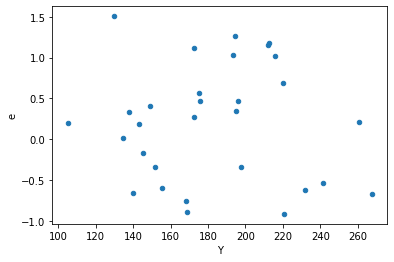

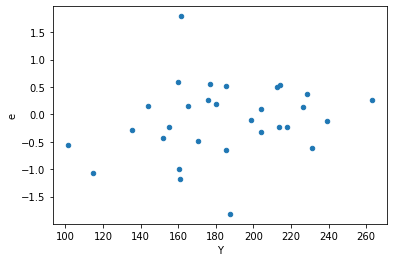

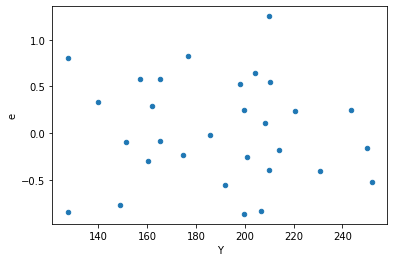

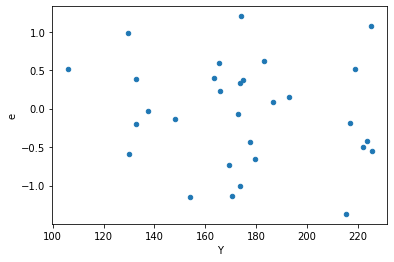

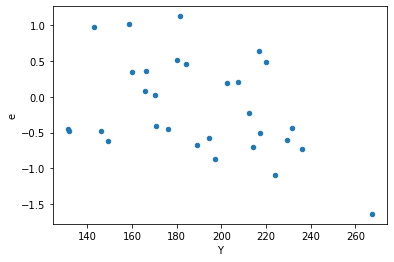

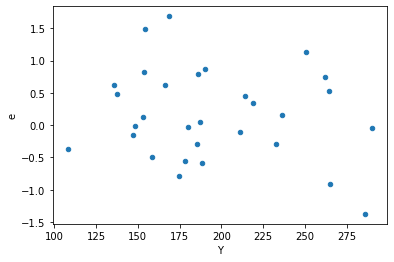

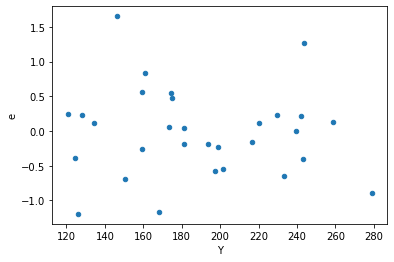

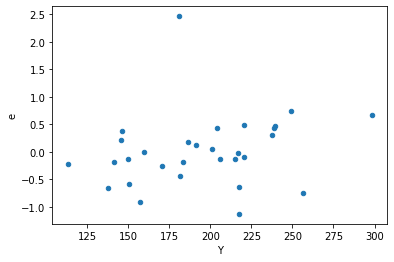

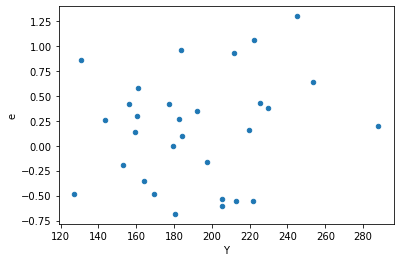

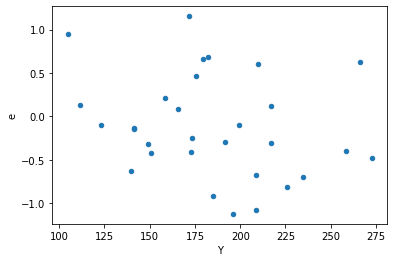

In [28]:
tablenew0.plot(x ='Y', y='e', kind = 'scatter')
tablenew1.plot(x ='Y', y='e', kind = 'scatter')
tablenew2.plot(x ='Y', y='e', kind = 'scatter')
tablenew3.plot(x ='Y', y='e', kind = 'scatter')
tablenew4.plot(x ='Y', y='e', kind = 'scatter')
tablenew5.plot(x ='Y', y='e', kind = 'scatter')
tablenew6.plot(x ='Y', y='e', kind = 'scatter')
tablenew7.plot(x ='Y', y='e', kind = 'scatter')
tablenew8.plot(x ='Y', y='e', kind = 'scatter')
tablenew9.plot(x ='Y', y='e', kind = 'scatter')

In [35]:
table_data_all.to_csv('data_groupwise_0.3_0.7_n250.csv')
files.download('data_groupwise_0.3_0.7_n250.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>